## Peak vs. integrated fluxes

Investigating flux scale issues, differences between peak vs. integrated flux are apparent. This notebook will explore making various plots to try and understand what is happening.

Will focus on plotting results from mosaics. Even if absolute fluxes have small offsets due to PB correction, the integrated vs. peak flux behavior should remain the same.

In [1]:
#load necessary packages
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import os
import astropy.units as u
from astropy.io.fits import getheader
from flux_functions import *
import aplpy

/home/apercal/pipeline/local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [ ]:
data = get_pybdsf_comp('191209026')
print(data)
print(data.colnames)

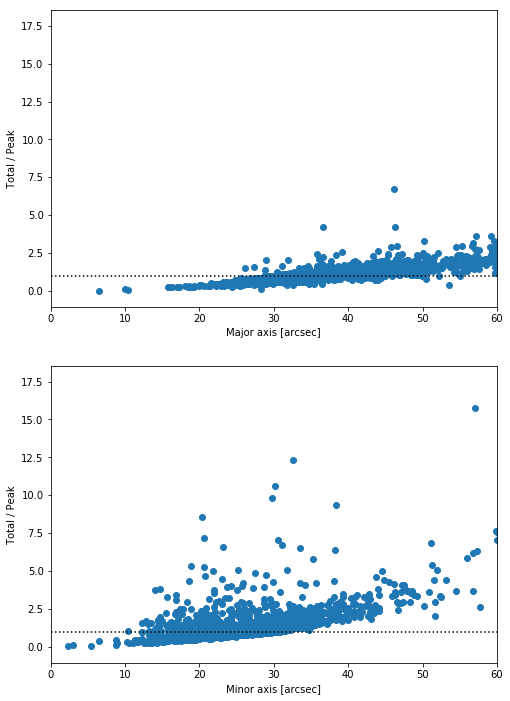

In [3]:
fig = plot_int_peak_size('191209026')

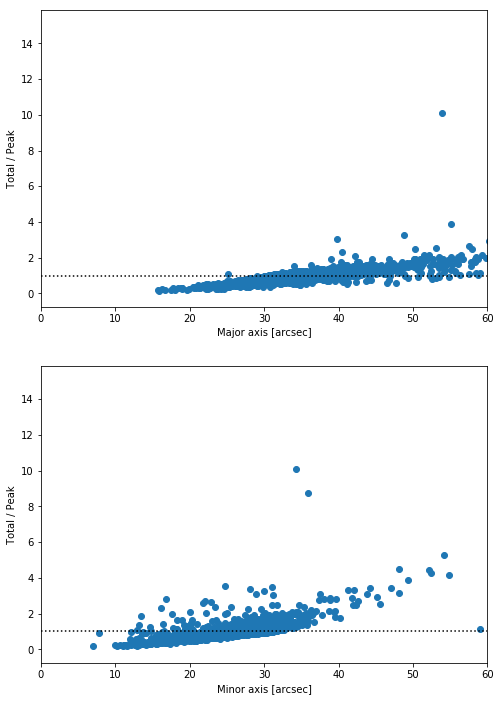

In [4]:
fig = plot_int_peak_size('191004042')

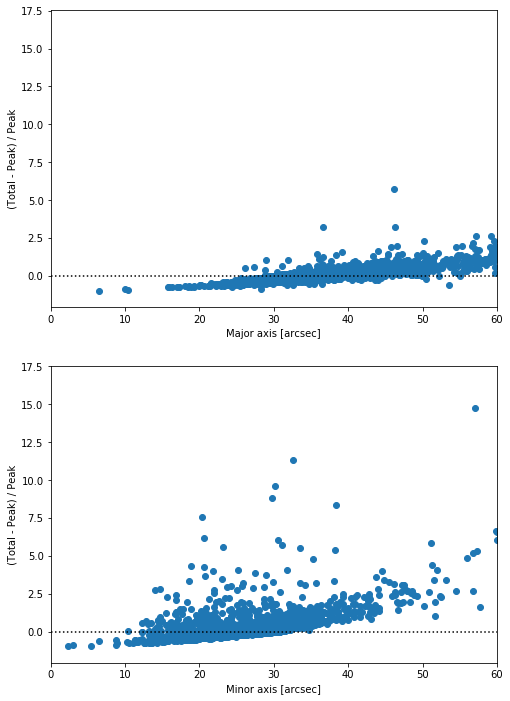

In [5]:
fig = plot_int_peak_norm_size('191209026')

See a big difference between major and minor axis, but think things should have been convolved to a circular beam as part of the mosaic. Get beam information from header.

In [6]:
bmaj, bmin = get_beam_info('191209026')
print(bmaj, bmin)

30.2375681698 arcsec 30.2375648171 arcsec


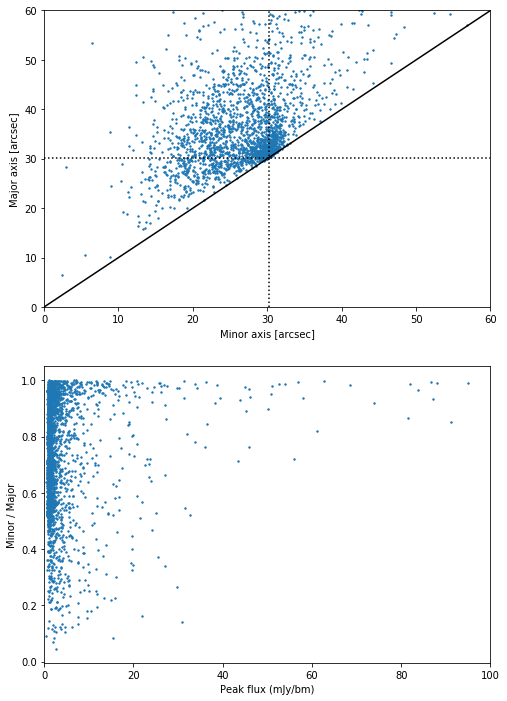

In [7]:
fig = plot_maj_min('191209026')

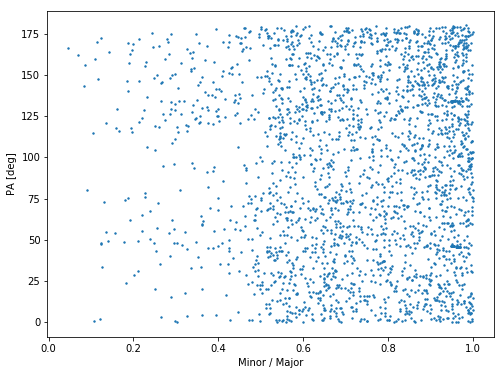

In [8]:
fig=plot_pa('191209026')

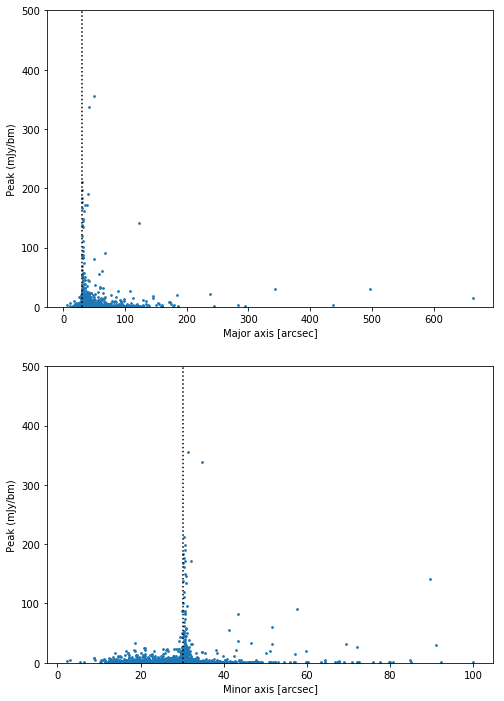

In [9]:
fig = plot_peak_size('191209026')

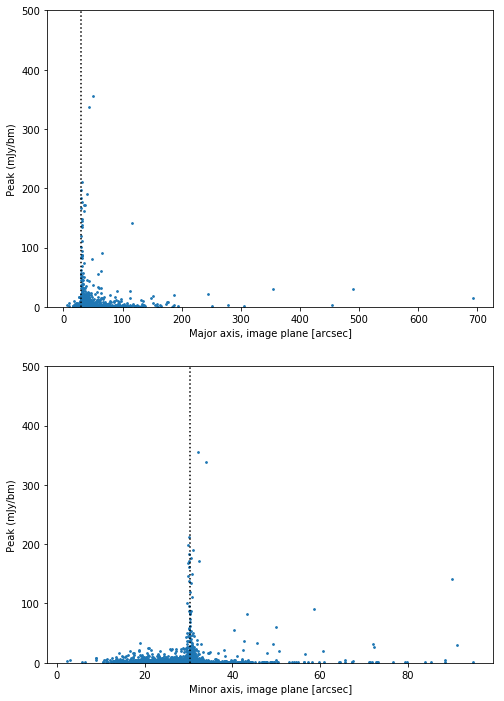

In [10]:
fig = plot_peak_size('191209026',image_plane = True)

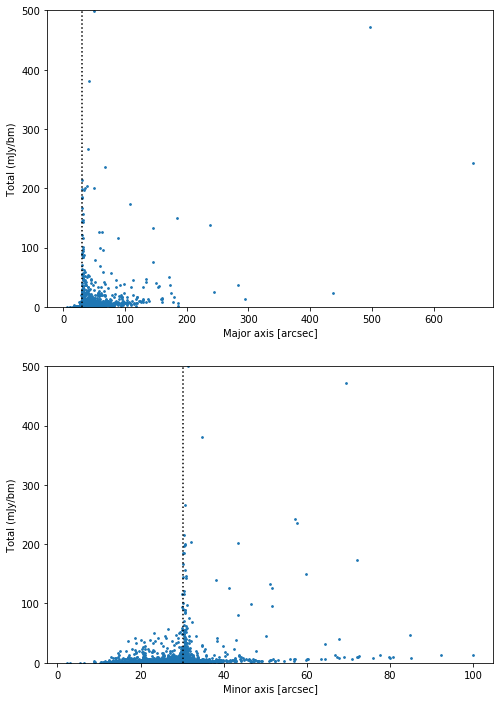

In [12]:
fig = plot_total_size('191209026')

In [ ]:
fig = plot_cutouts_minor('191209026', 5*u.arcsec,10*u.arcsec)

INFO: Setting slices=[0, 0] [aplpy.core]


/home/apercal/pipeline/local/lib/python2.7/site-packages/aplpy/labels.py:432: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self.coord == x or self.axis.apl_tick_positions_world[ipos] > 0:


INFO: Auto-setting vmin to -4.349e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.062e-02 [aplpy.core]


/home/apercal/pipeline/local/lib/python2.7/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -4.349e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.062e-02 [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -4.349e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.062e-02 [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -4.349e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.062e-02 [aplpy.core]


In [3]:
def plot_cutouts_minor(taskid, minormin, minormax):
    """
    Plot cutouts of sources with minor axis limits as given
    inputs:
        taskid: string
        minormin: smallest minor axis size in arcsec (units)
        minormax: largest minor axis in arcsec (units)
    """
    filename = '{0}_mosaic.fits'.format(taskid)
    path_to_mosaic = os.path.join(mosaic_path,taskid,internal_mosaic_path,filename)
    
    data = get_pybdsf_comp(taskid)
    
    #find indices of sources
    minoravg = (minormin + minormax) / 2. 
    minorhalf = (minormax - minormin) / 2.
    ind = np.where(np.abs(data['Min']-minoravg.to(u.deg).value) <= 
                   minorhalf.to(u.deg).value)[0]
    
    nplots = len(ind)
    fig = plt.figure(figsize=(14, 14))
    
    if nplots > 20:
        print(('Requesting {0} plots! This is too many. '
               'Please retry minor axis limits').format(nplots))
    else:
        nx = 4
        ny = int(np.ceil(nplots / nx))
        i=1
 
        for source in ind:
        #iterate over index array
            try:
                f1 = aplpy.FITSFigure(path_to_mosaic,figure=fig,subplot=(ny,nx,i))
                f1.show_grayscale()
                #recenter w/ 2 arcmin radius
                f1.recenter(data['RA'][ind],data['DEC'][ind],radius=2/60.)
                i=i+1
            except:
                #if a plot fails, keep going
                i=i+1
                
    return fig

In [18]:
#find smallest sources and examine
small_ind = np.where(data['Min'] < 10./3600)
print(small_ind)
print(len(small_ind))

(array([ 449,  454,  626,  863, 1154, 1339, 1478]),)
1


3 3
1 449
INFO: Setting slices=[0, 0] [aplpy.core]
1 449 24.2227824399043 32.9996481301904
INFO: Auto-setting vmin to -4.349e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.062e-02 [aplpy.core]
2 454
INFO: Setting slices=[0, 0] [aplpy.core]
2 454 24.50279350912054 32.27189120171712
INFO: Auto-setting vmin to -4.349e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.062e-02 [aplpy.core]
3 626
INFO: Setting slices=[0, 0] [aplpy.core]
3 626 24.40861867539329 32.90164274382094
INFO: Auto-setting vmin to -4.349e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.062e-02 [aplpy.core]
4 863
INFO: Setting slices=[0, 0] [aplpy.core]
4 863 24.21779155685304 31.69344198989269
INFO: Auto-setting vmin to -4.349e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.062e-02 [aplpy.core]
5 1154
INFO: Setting slices=[0, 0] [aplpy.core]
5 1154 23.79729791854497 32.99011045896329
INFO: Auto-setting vmin to -4.349e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.062e-02 [aplpy.core]
6 1339
INFO: Setting slices=[0, 0] [aplpy

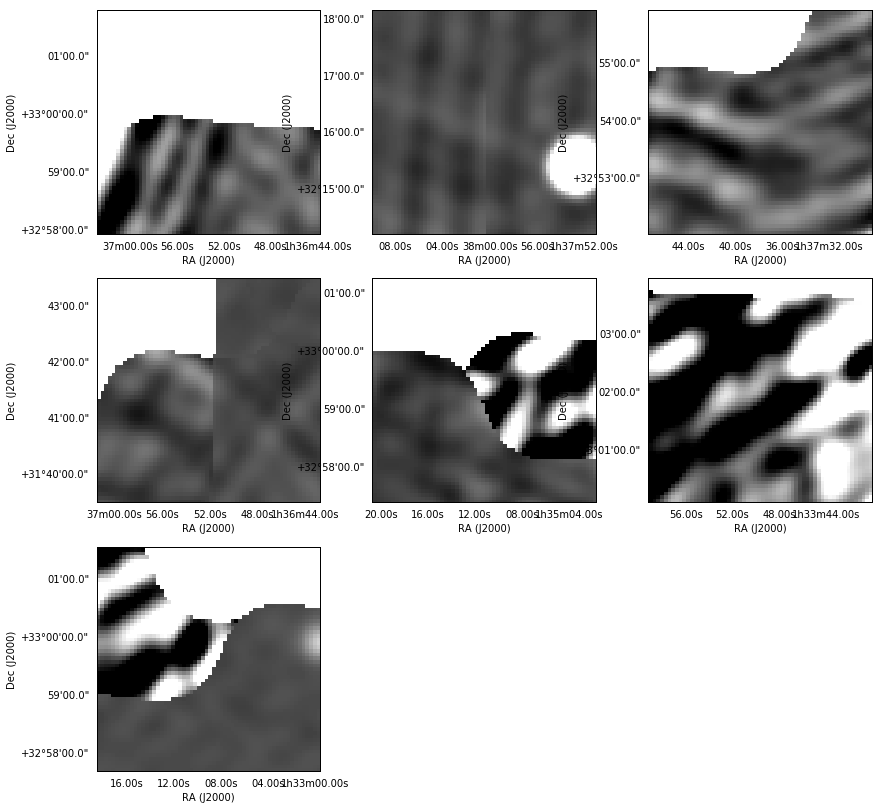

In [42]:
#iterate over sources and make snapshot images
taskid = '191209026'
mosaic_path = '/tank/apertif/mosaics/'
internal_mosaic_path = 'mosaics/continuum/mosaic/'
filename = '{0}_mosaic.fits'.format(taskid)
path_to_mosaic = os.path.join(mosaic_path,taskid,internal_mosaic_path,filename)

nx = int(np.ceil(np.sqrt(len(small_ind[0]))))
ny = int(np.ceil(np.sqrt(len(small_ind[0]))))

print(nx,ny)
i=1

fig = plt.figure(figsize=(14, 14))

for ind in small_ind[0]:
    #iterate over index array
    #print(i,ind)
    try:
        f1 = aplpy.FITSFigure(path_to_mosaic,figure=fig,subplot=(nx,ny,i))
        print(i, ind, data['RA'][ind],data['DEC'][ind])
        f1.show_grayscale()
        f1.recenter(data['RA'][ind],data['DEC'][ind],radius=2/60.)
        i=i+1
    except:
        print(i)
        i=i+1

INFO: Setting slices=[0, 0] [aplpy.core]
1 24.50279350912054 32.27189120171712
INFO: Auto-setting vmin to -4.349e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.062e-02 [aplpy.core]
2 24.40861867539329 32.90164274382094
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -4.349e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.062e-02 [aplpy.core]


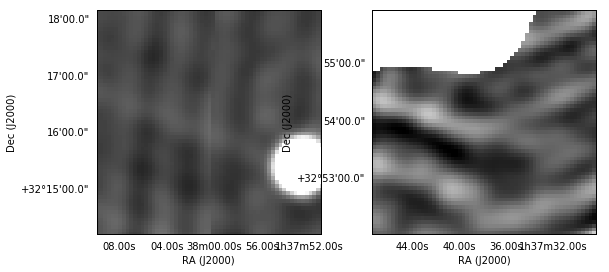

In [41]:
path_to_mosaic = os.path.join(mosaic_path,taskid,internal_mosaic_path,filename)
ind=454
nx=3
ny=3
i=1

fig = plt.figure(figsize=(14, 14))
f1 = aplpy.FITSFigure(path_to_mosaic,figure=fig,subplot=(nx,ny,i))
print(i, data['RA'][ind],data['DEC'][ind])
f1.show_grayscale()
f1.recenter(data['RA'][ind],data['DEC'][ind],radius=2/60.)

i = i+1
ind = 626
print(i, data['RA'][ind],data['DEC'][ind])
f1=aplpy.FITSFigure(path_to_mosaic,figure=fig,subplot=(nx,ny,i))
f1.show_grayscale()
f1.recenter(data['RA'][ind],data['DEC'][ind],radius=2/60.)


In [43]:
minor = 10*u.arcsec
print(minor.to(u.deg).value)

0.00277777777778
